In [1]:
from sympy import *
init_printing() 

from sympsi.boson import *
from sympsi import *
from sympsi.pauli import *

In [23]:
theta, t, phi, f = symbols("θ, t, φ, f")
eps, Delta, Omega_q, Omega_d = symbols("ε, Δ, ω_q, ω_d",real=True, positive=True)
Hsym = symbols("H")

sx, sy, sz = SigmaX(), SigmaY(), SigmaZ()
sm = sx-I*sy

In [3]:
Hq = Omega_q/2 * sz
arg = Omega_d*t+phi
Hd = f*sx*(exp(I*arg)+exp(-I*arg))/2

H = Hq+Hd

Eq(Hsym, H)

In [4]:
U = exp(I * Omega_d/2 * sz * t); U

In [5]:
H1 = hamiltonian_transformation(U, H)
Eq(Hsym, H1)

In [6]:
H2 = collect(H1.expand(), (sx, sy, sz))
Eq(Hsym, H2)

In [7]:
H2 = simplify(H2.subs(sin(𝑡*Omega_d), (exp(I*𝑡*Omega_d)-exp(-I*𝑡*Omega_d))/2/I))
H2 = simplify(H2.subs(cos(𝑡*Omega_d), (exp(I*𝑡*Omega_d)+exp(-I*𝑡*Omega_d))/2))

H3 = collect(H2.expand(), (f*sx/2, sz, I*f*sy/2))

Eq(Hsym, H3)

In [19]:
#RWA

H3 = collect(H3.expand(), (exp(2*I*𝑡*Omega_d), exp(-2 * I * Omega_d * t), sz))
H4 = drop_terms_containing(H3, [exp(2*I*𝑡*Omega_d), exp(-2 * I * Omega_d * t)])
H4 = collect(H4.expand(), (f*sx, f*sy*I, sz))

Eq(Hsym, H4)

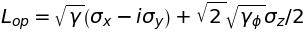

In [48]:
# Lindblad equation

ρ_11 = Function("ρ_11")(t)
ρ_12 = Function("ρ_12")(t)
ρ_21 = Function("ρ_21")(t)
ρ_22 = Function("ρ_22")(t)
rho = Matrix([[ρ_11,ρ_12],[ρ_21, 1-ρ_11]]) 


γ = Symbol("γ", real=True, positive=True)
γ_ϕ = Symbol("γ_ϕ", real=True, positive=True)
t = Symbol("t", real=True, positive=True)
L_op = Symbol("L_op", real=True, positive=True)


L_ϕ = sqrt(γ_ϕ/2)*sz
L_r = sqrt(γ)*sm

L = L_ϕ + L_r
Eq(L_op, L)

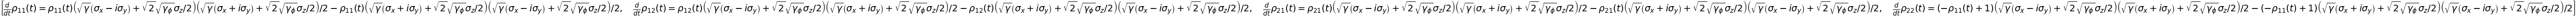

In [49]:
L = operator_lindblad_dissipator(L, rho)

L = I*(rho*H - H*rho) + L

diffs = Matrix([[diff(ρ_11), diff(ρ_12)], [diff(ρ_21), diff(ρ_22)]])

odes = [Eq(diff, right) for diff, right in zip(list(diffs), list(L))][:4]

odes